<h3><b>Introduction to Data Analytics - Exercise set 4, exercise 3b</b></h3>
<h4><b>Storms dataset</b></h4>

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_4/hurricane.png" />

<b>Tip:</b> You can just click "Run All" to see the results of this notebook. Some of these exercises have some heavy plots that can take even 1 minute to produce.

<b>Remember:</b> not every dataset has interesting correlations and/or features (too much randomness or variance usually, or not enough data). Also, not each correlation implies there's a causation. Finally, not every plot is useful, that's why it's important to try multiple plots in order to "see under the hood". Typically pair plots, joint plots, regression plots, heatmaps and box plots are most useful, but there are some exceptions too.

<h3><b>Quick summary of data:</b></h3>

<p>This datasets contains data about storms and hurricanes in the Atlantic. The data is from 1975 to 2021. Some older data has missing data. The status -column contains the storm classification, the category is based on Saffir-Simpson hurricane category (N/A, 0-5. 5 is most severe).</p>
<p>This dataset is also split into quantiles by pandas.</p>
<p>Original data: <a href="https://vincentarelbundock.github.io/Rdatasets/doc/dplyr/storms.html">https://vincentarelbundock.github.io/Rdatasets/doc/dplyr/storms.html</a></p>

<h3><b>Questions for this exercise:</b></h3>
<b>Answer the questions either as code comments or as markdown. Use separate cells to write your answers.</b><br/><br/>
<li>What determines a strong hurricane? This information is of course already in the category -column, but there seems to be two columns that define a strong hurricane. What are these variables, and how they seem to correlate with each other in case of a severe hurricane?</li>
<li>Based on the dataset, when is the most active hurricane season (months) in Atlantic?</li>
<li>Which seaborn plots are useful in this notebook, and which are not? Why? (you can remove the unnecessary plots from this notebook if you wish too).</li>
<li>Which are more useful in this case, correlations or plots? Or are they both useful?</li>

<b>Extra questions/tasks for extra points:</b>
<li>Based on this dataset, which hurricanes in this dataset seem to be strongest, and what were they called? (use Google). Note that actual statistics might differ from this dataset, since this dataset is only a sample of observations. (tip: in addition to looking at the seaborn plots, you can also inspect the pandas DataFrames)</li>
<li>The strongest hurricanes in the dataset seem to show a certain behavior when it comes to time. When does this happen (clockwise) and can you find an explanation for this by using Google?</li>
<li>This notebook mostly concentrates on the top 25% hurricanes. Can you find something interesting in the other quantiles?</li>
<li>Any other ideas about this dataset? Any ways to expand or improve the dataset and the analysis?</li>


<hr />

<b style="color: red;">Place your answers here!</b>

#### What determines a strong hurricane? This information is of course already in the category -column, but there seems to be two columns that define a strong hurricane. What are these variables, and how they seem to correlate with each other in case of a severe hurricane?
1. Category and wind: these columns have strong correlation which means that higher wind speed is directly related to stronger hurricane.
2. Category and pressure: Between them are strong negative correlation which means that lower pressure, the stronger the hurricane.
3. Pressure and wind: they have strong negative correlation, lower pressure, the higher wind speed or lower wind speed, the higher pressure.

#### Based on the dataset, when is the most active hurricane season (months) in Atlantic?
August and September.

#### Which seaborn plots are useful in this notebook, and which are not? Why? (you can remove the unnecessary plots from this notebook if you wish too)
1. sns.pairplot(df1, hue="status"): It adds more information by highlighting hurricane statuses, making it more understandable.
2. pivot table + heatmap for month/year and wind and pivot table + heatmap for month/year and pressure: these give useful insights about wind speeds and pressure across time dimensions.
3. (sns.lmplot) for wind/pressure vs. year/month:These are helpful to  analyze how wind or pressure changes over time or across categories.
4. (sns.boxplot) for Category vs. Wind/Pressure: I think, it gives deeper insights into storm roughness differences across categories. 
5. Correlation Matrix Heatmap: Useful for understanding relationships between variables.
#### Not Useful: 
1. Pair Plots Without hue: gives less information. 
2. sns.heatmap for hour: I think,  hourly data is too noisy. 


#### Which are more useful in this case, correlations or plots? Or are they both useful
Both are useful. 

<hr />

<h4><b>Imports and load the original dataset</b></h4>

In [11]:
# import the common data analytics modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# load dataset
df = pd.read_csv('storms.csv')

# coordinates not needed at this point, remove
df = df.drop('lat', axis=1)
df = df.drop('long', axis=1)

# handle missing values, since seaborn (or machine learning) doesn't work with them

# if category is missing, fill with category 0 (least severe)
df['category'] = df['category'].fillna(0)

# if diameters are missing, fill with 0
df['tropicalstorm_force_diameter'] = df['tropicalstorm_force_diameter'].fillna(0)
df['hurricane_force_diameter'] = df['hurricane_force_diameter'].fillna(0)

# whatever is left with missing data, remove it
df = df.dropna()

# day brings too much variance in the dataset, remove it
df = df.drop('day', axis=1)

# finally, reset index and drop the original index
df = df.reset_index()
df = df.drop('index', axis=1)
del df[df.columns[0]]

# group by name of the hurricane as well as wind and pressure
values = df.groupby('name').sum(numeric_only=True).sort_values(by=['wind', 'pressure'], ascending=False)

# split to quantiles
df_highest = list(values.query('wind >= wind.quantile(q=0.94)').index)
df_average_plus = list(values.query('wind >= wind.quantile(q=0.68) and wind < wind.quantile(q=0.94)').index)
df_average_minus = list(values.query('wind >= wind.quantile(q=0.25) and wind < wind.quantile(q=0.68)').index)
df_lowest = list(values.query('wind < wind.quantile(q=0.25)').index)

# create dataframes based on quantile hurricanes
df1 = df[df['name'].isin(df_highest)]
df2 = df[df['name'].isin(df_average_plus)]
df3 = df[df['name'].isin(df_average_minus)]
df4 = df[df['name'].isin(df_lowest)]

# correlation matrices
correlations = df.corr(numeric_only=True)
correlations1 = df1.corr(numeric_only=True)
correlations2 = df2.corr(numeric_only=True)
correlations3 = df3.corr(numeric_only=True)
correlations4 = df4.corr(numeric_only=True)

<hr>

<b>Extra questions/tasks for extra points:</b>

<b>Based on this dataset, which hurricanes in this dataset seem to be strongest, and what were they called? (use Google). Note that actual statistics might differ from this dataset, since this dataset is only a sample of observations. (tip: in addition to looking at the seaborn plots, you can also inspect the pandas DataFrames)<b>

In [24]:
df1["category"].value_counts()

category
0.00    2296
1.00     636
2.00     287
3.00     138
4.00     119
5.00      25
Name: count, dtype: int64

In [25]:
df1["status"].value_counts()

status
hurricane                 1205
tropical storm            1069
tropical depression        554
extratropical              352
other low                  154
subtropical storm           67
tropical wave               62
subtropical depression      34
disturbance                  4
Name: count, dtype: int64

In [13]:
# I need to filter the status column by hurricane only
hurricanes = df1[df1['status'] == 'hurricane']
hurricanes['status'].unique()

array(['hurricane'], dtype=object)

In [14]:

# I need to find the strongest hurricanes by wind and pressure
strong_hurricanes = hurricanes.groupby(['name', 'year']).agg({'wind': 'max', 'pressure': 'min'}).sort_values(by=['wind', 'pressure'], ascending=[False, True])
# On the above I mentioned that pressure and wind have strong relation to the hurricane
# since pressure has negative correlation with hurricane, I need to sort the data by lowest pressure
# but for the wind, I need to sort by highest wind, because it has positive correlation with hurricane
strong_hurricanes.head()

# For doing this task I read this source : https://www.geeksforgeeks.org/apply-operations-to-groups-in-pandas/

,,wind,pressure
name,year,,
Maria,2017,150,908
Felix,2007,150,929
Ivan,2004,145,910
Emily,2005,140,929
Dennis,2005,130,930


<b>Hurricane Maria was an extremely powerful and devastating tropical cyclone that affected the northeastern Caribbean in September 2017<b><br>
Sources: https://en.wikipedia.org/wiki/Hurricane_Maria<br>
<b> On the internet I found this information about Maria in 2017: Wind speed is 175 mph (280 km/h) and  pressure is 908 mbar<b><br>
<b> The wind speed is not the same, but the pressure is same<b>


<br>Any other ideas about this dataset? Any ways to expand or improve the dataset and the analysis?<br>

In [28]:
df1.head()

,name,year,month,hour,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
308,Frances,1976,8,12,tropical depression,0.00,25,1009,0.00,0.00
309,Frances,1976,8,18,tropical storm,0.00,50,1002,0.00,0.00
310,Frances,1976,8,12,tropical storm,0.00,50,998,0.00,0.00
311,Frances,1976,8,18,tropical storm,0.00,60,994,0.00,0.00
312,Frances,1976,8,0,hurricane,1.00,65,991,0.00,0.00


In [32]:
# let's find what variables have highest impact on the category
category = df1[['year', 'month', 'hour', 'wind', 'pressure', 'tropicalstorm_force_diameter', 'hurricane_force_diameter', 'category']]

In [33]:
from sklearn.feature_selection import SelectKBest, chi2

# Convert the status column to categorical codes
X = category.drop('category', axis=1)
y = category['category']

# convert all continuous variables to integer,
# and convert all negative numbers to 0
X_cat = X.select_dtypes(include=[np.number]).astype(int)
X_cat = X_cat.clip(lower=0)

chi_features = SelectKBest(chi2, k=len(X_cat.columns))

# fit our data to the SelectKBest
best_features = chi_features.fit(X_cat, y)

# use decimal format in table
pd.options.display.float_format = '{:.2f}'.format

# the higher the score, the more effect that column has on the target
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns, df_features], axis=1)
f_scores.columns = ['Features', 'Score']
f_scores.sort_values(by='Score', ascending=False)


,Features,Score
6,hurricane_force_diameter,79410.95
5,tropicalstorm_force_diameter,47593.34
3,wind,39577.12
4,pressure,1085.13
2,hour,26.76
1,month,12.60
0,year,5.35


 A bigger area of strong winds, a larger area of weaker winds and speed wind help us to know how rough or impactful a storm is. 

<hr>

<h4><b>seaborn plots - pairplots</b></h4>

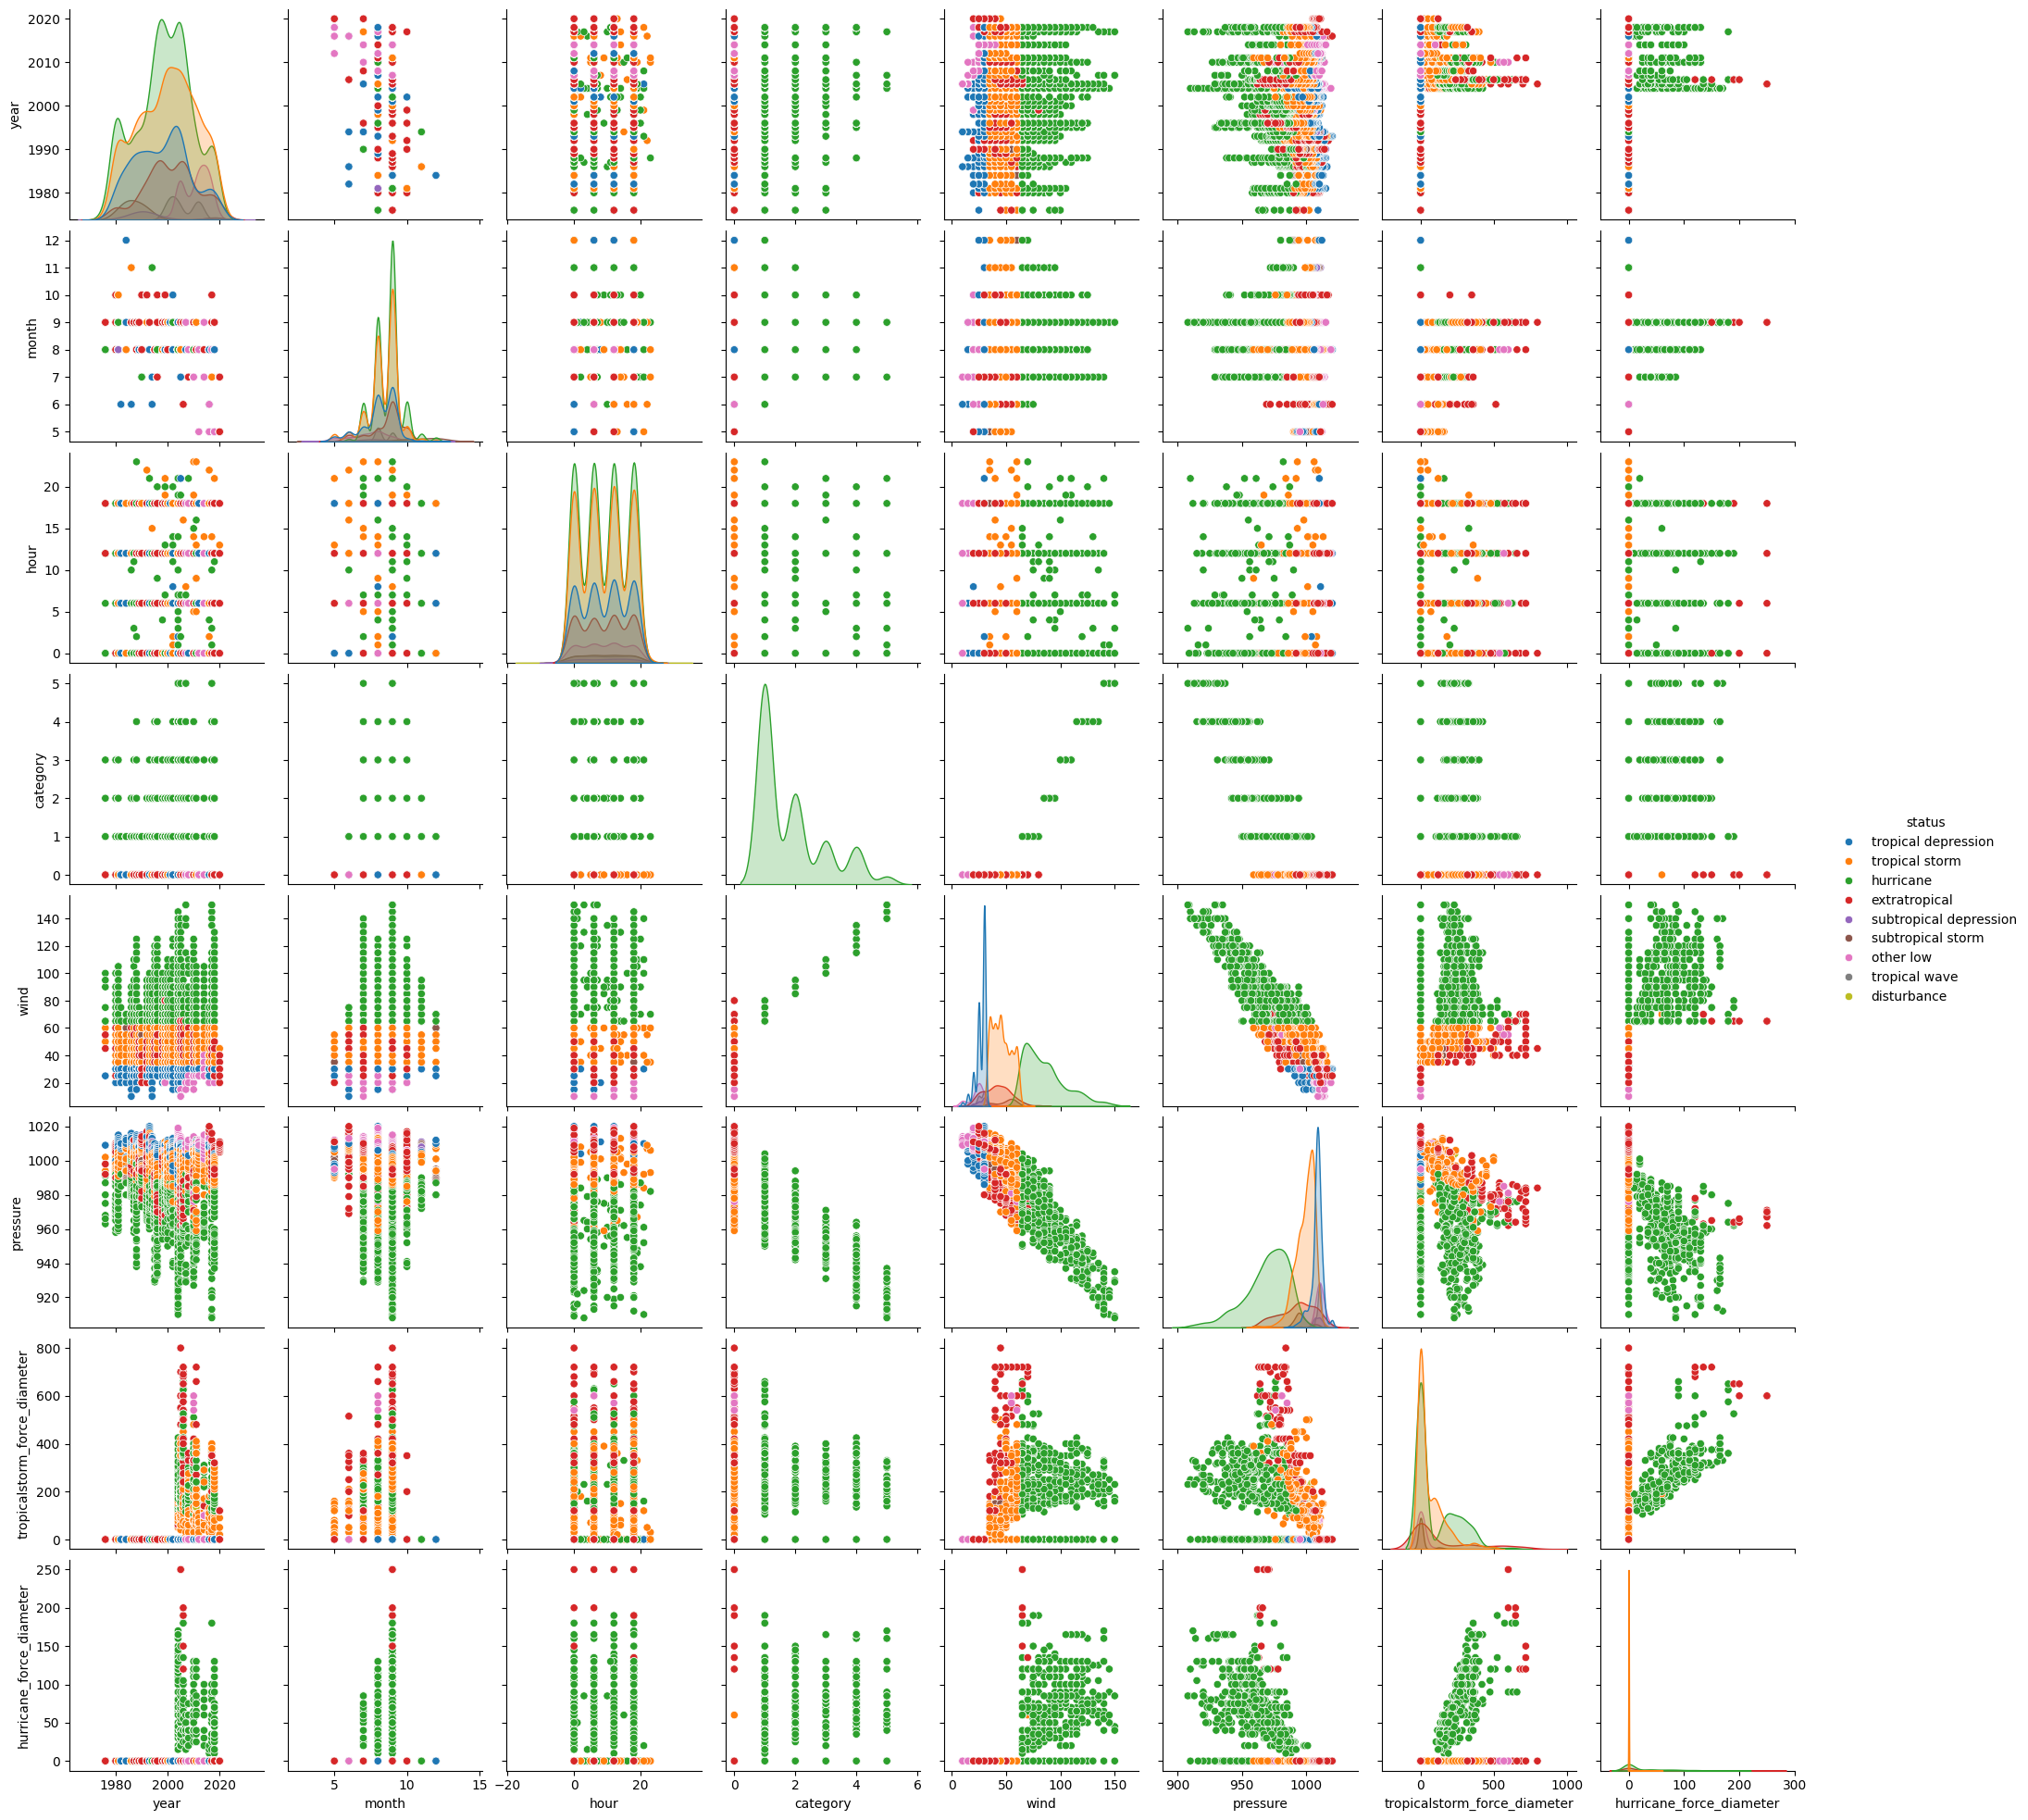

In [ ]:
# basic pair plot, hue on status
sns.pairplot(df1, hue="status")

<h4><b>seaborn plots - heatmaps</b></h4>

<Axes: xlabel='year', ylabel='month'>

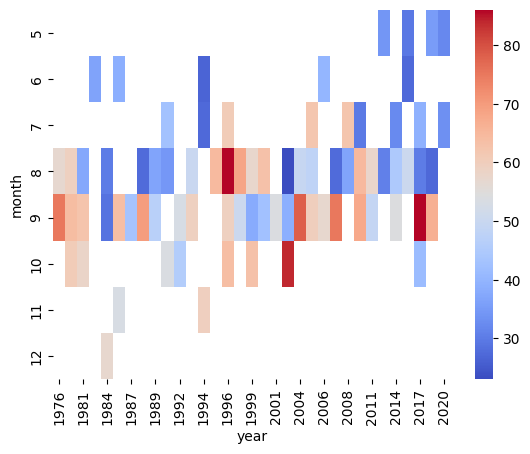

In [ ]:
# pivot table + heatmap for month/year and wind
pt = df1.pivot_table(index='month', columns='year', values='wind')
sns.heatmap(pt, cmap='coolwarm')

<Axes: xlabel='year', ylabel='month'>

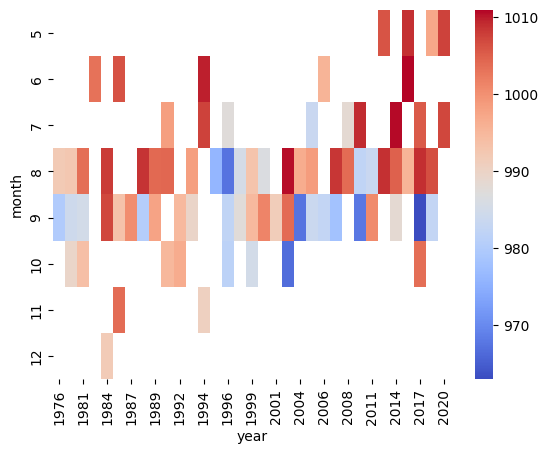

In [ ]:
# pivot table + heatmap for month/year and pressure
pt = df1.pivot_table(index='month', columns='year', values='pressure')
sns.heatmap(pt, cmap='coolwarm')

<h4><b>seaborn plots - regression plots</b></h4>

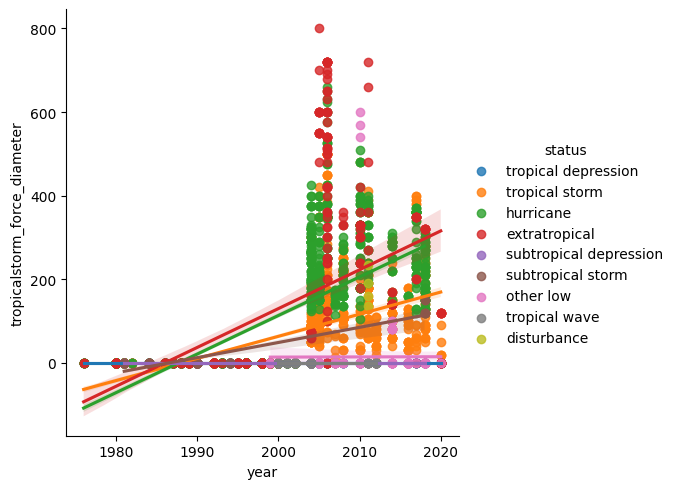

In [24]:
# regression plot for tropical storm diameter and year, hue on status
sns.lmplot(x='year', y='tropicalstorm_force_diameter', data=df1, hue='status')

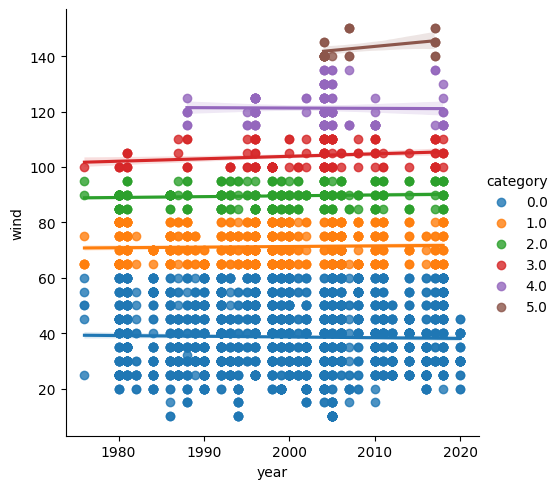

In [ ]:
# regression plot for wind/year, hue on category
sns.lmplot(x='year', y='wind', data=df1, hue='category')

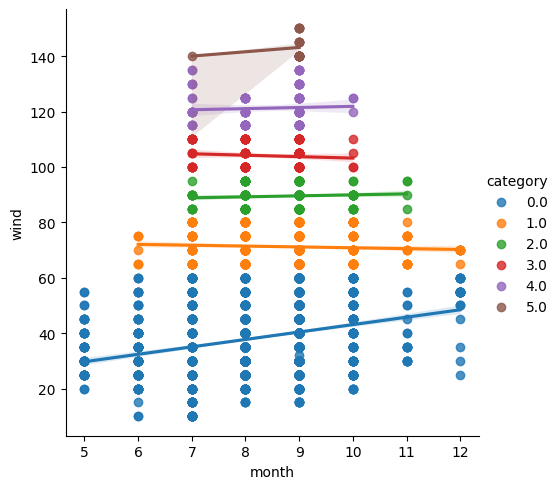

In [ ]:
# regression plot for wind/month, hue on category
sns.lmplot(x='month', y='wind', data=df1, hue='category')

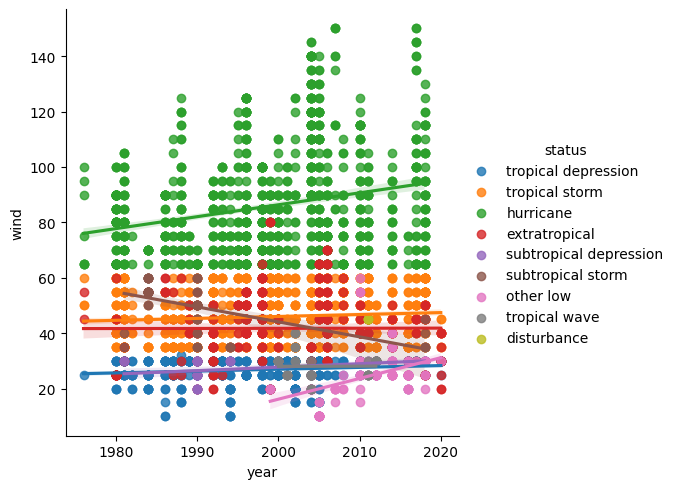

In [ ]:
# regression plot for wind/year, hue on status
sns.lmplot( x='year', y='wind', data=df1, hue='status')

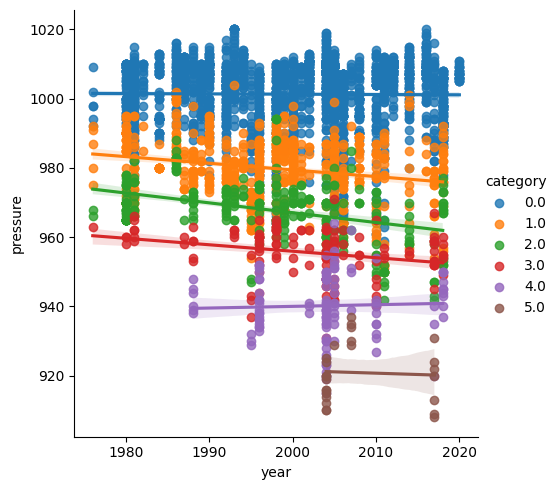

In [ ]:
# regression plot for pressure/year, hue on category
sns.lmplot(x='year', y='pressure', data=df1, hue='category')

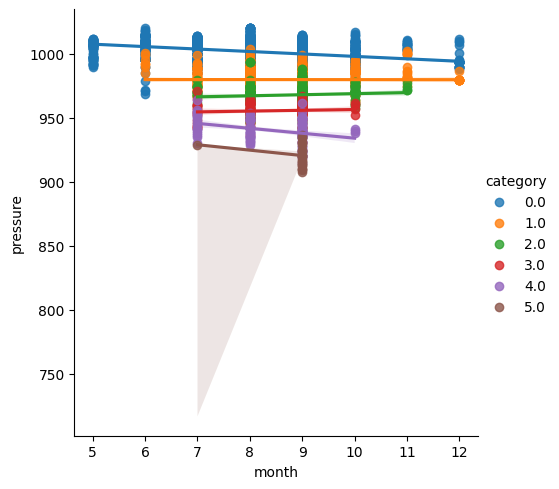

In [ ]:
# regression plot for pressure/month, hue on category
sns.lmplot(x='month', y='pressure', data=df1, hue='category')

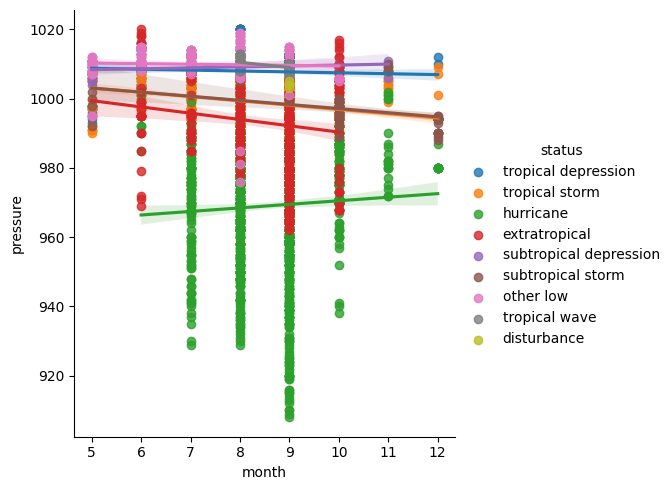

In [ ]:
# regression plot for pressure_month, hue on status
sns.lmplot(x='month', y='pressure', data=df1, hue='status')

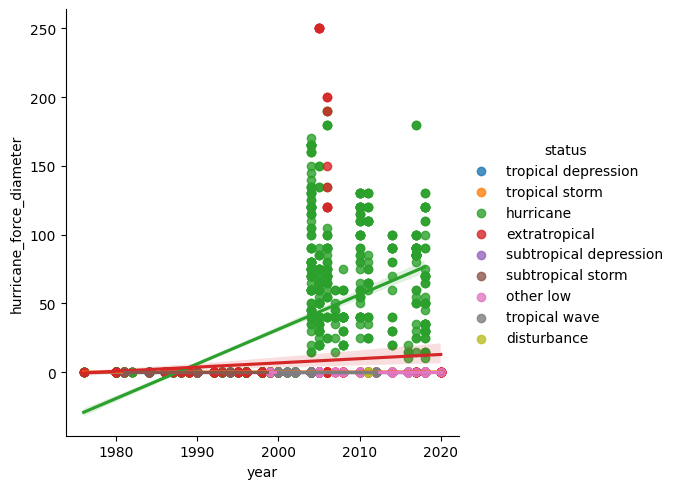

In [ ]:
# regression plot for hurricane force diameter and year, hue on status
sns.lmplot(x='year', y='hurricane_force_diameter', data=df1, hue='status')

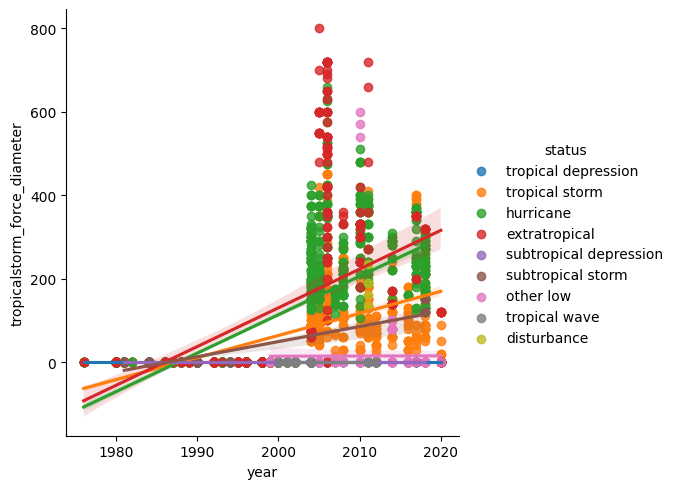

In [22]:
# regression plot for tropical storm diameter and year, hue on status
sns.lmplot(x='year', y='tropicalstorm_force_diameter', data=df1, hue='status')

<h4><b>seaborn plots - boxplots</b></h4>

<Axes: xlabel='category', ylabel='wind'>

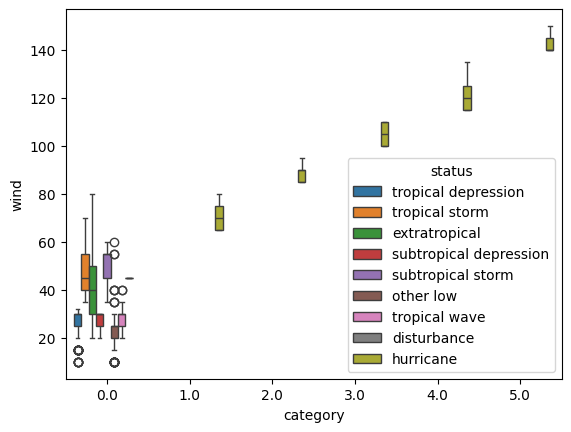

In [ ]:
# boxplot, category/wind, hue on status
sns.boxplot(x='category', y='wind', data=df1, hue='status')

<Axes: xlabel='category', ylabel='pressure'>

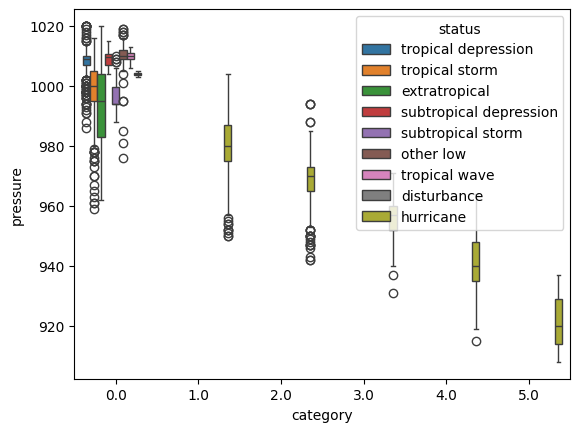

In [ ]:
# boxplot, category/pressure, hue on status
sns.boxplot(x='category', y='pressure', data=df1, hue='status')

<h4><b>seaborn plots - heatmaps for correlations matrices</b></h4>

<Axes: >

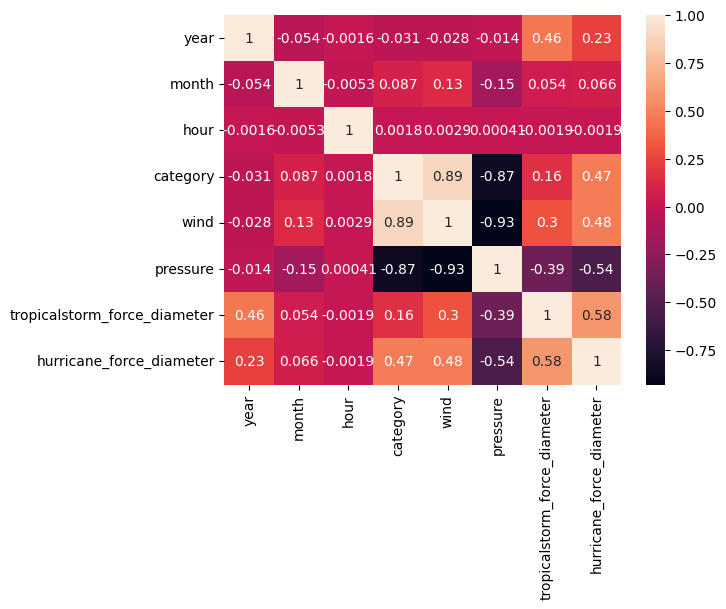

In [ ]:
# correlation matrix heatmap, whole dataset
sns.heatmap(correlations, annot=True)

<Axes: >

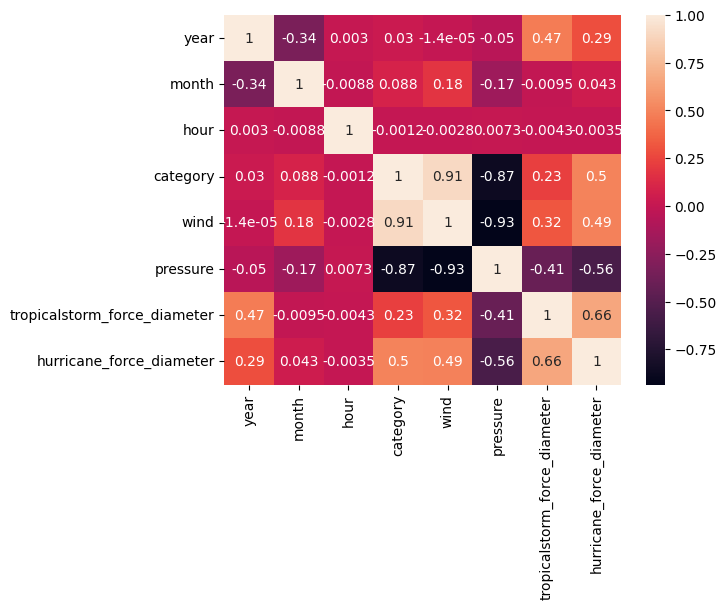

In [ ]:
# correlation matrix heatmap for top hurricanes
sns.heatmap(correlations1, annot=True)